In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

from skimage import transform, io
from skimage.color import rgb2gray, rgba2rgb

### load and rescale images

In [18]:
img1 = io.imread("data/house-village-angle-1.png")
img2 = io.imread("data/house-village-angle-2.png")

# img1 = rgb2gray(rgba2rgb(img1))
# img2 = rgb2gray(rgba2rgb(img2))

In [19]:
img1.shape, img2.shape

((1080, 1920, 4), (1080, 1920, 4))

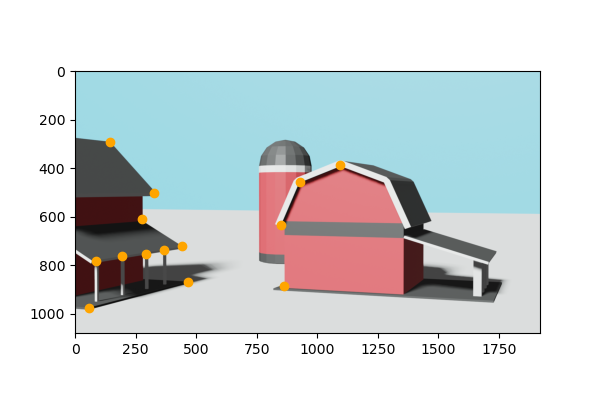

In [20]:
# create figure
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

ax.imshow(img1, cmap="gray")
points1 = [[1093, 388], [928, 458], [850, 635], [861, 888], 
          [440, 723], [366, 736], [292, 753], [193, 763], 
          [85, 782], [275, 611], [325, 504], [143, 290],
          [465, 869], [56, 977]] #, [870, 380], [911, 380], [824, 384]]
for point in points1:
    ax.scatter(*point, color="orange")

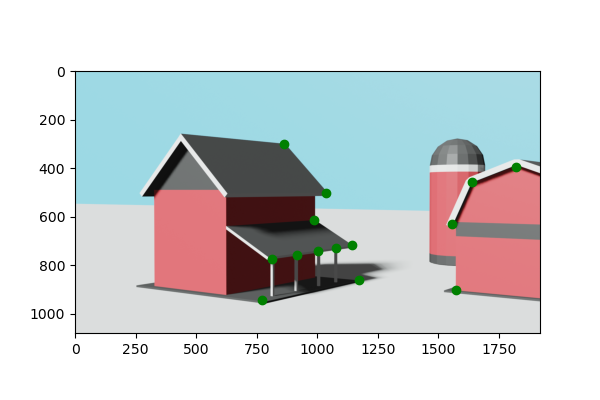

In [21]:
# create figure
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

ax.imshow(img2, cmap="gray")
points2 = [[1819, 394], [1638, 457], [1555, 630],
          [1572, 902], [1142, 716], [1076, 731], 
          [1002, 741], [915, 758], [812, 775], 
          [985, 615], [1035, 501], [861, 299],
          [1171, 863], [771, 946]]
for point in points2:
    ax.scatter(*point, color="green")

In [22]:
src = np.array(points2)
dst = np.array(points1)

tform = transform.ProjectiveTransform()
tform.estimate(src, dst)
warped = transform.warp(img1, tform, output_shape=(1080, 1920*2))

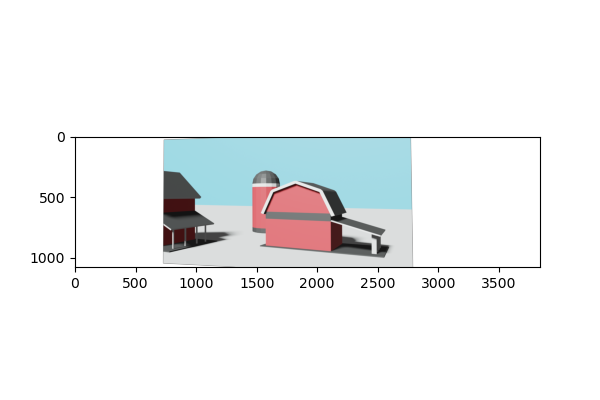

In [23]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

ax.imshow(warped, cmap="gray")

In [24]:
warped_ = warped[:, 700:2800]

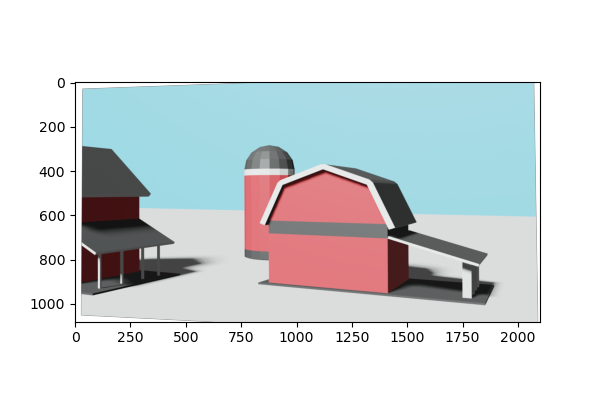

In [25]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

ax.imshow(warped_, cmap="gray")

In [26]:
io.imsave("data/warped_img.png", warped_)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
